### Pip install packages

In [2]:
pip install pandas matplotlib fredapi plotly nbformat

### Load libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import plotly.express as px

In [4]:
# Enable inline plotting for Jupyter Notebooks
%matplotlib inline

In [5]:
pd.set_option('display.max_colwidth', 1000)

### Fred guide

docs: https://pypi.org/project/fredapi/

In [6]:
fred = Fred(api_key='<YOUR API KEY>')

<Axes: title={'center': 'US GDP'}>

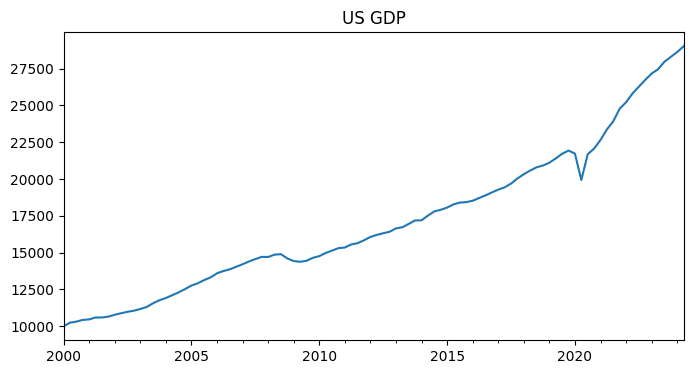

In [7]:
# Pull GDP data from FRED API
gdp_data = fred.get_series('GDP',observation_start='2000-01-01')

# Plot data
plt.figure(figsize=(8,4))
gdp_data.plot(title='US GDP')

In [8]:
gdp_data

,0
2000-01-01,10002.179
2000-04-01,10247.720
2000-07-01,10318.165
2000-10-01,10435.744
2001-01-01,10470.231
...,...
2023-04-01,27453.815
2023-07-01,27967.697
2023-10-01,28296.967
2024-01-01,28624.069


In [9]:
df = gdp_data.to_frame(name='GDP')

In [10]:
# Create the Plotly figure
fig = px.line(df, x=df.index, y=df.columns[0], title='US GDP (Bil. of $)',
                labels={'index': "Date", 'y': "Value"})

# Update layout for better readability
fig.update_layout(
    xaxis_title='',
    yaxis_title='',
    template="plotly_dark",
    width=700,
    height=400,
    plot_bgcolor="#282a36",
    paper_bgcolor="#282a36",
    ),

fig.update_traces(line=dict(width=3.5))

fig.show()

In [13]:
# Search for SAHM indicator
results = fred.search('sahm')
results.T



series id,SAHMREALTIME,SAHMCURRENT
id,SAHMREALTIME,SAHMCURRENT
realtime_start,2024-09-30 00:00:00,2024-09-30 00:00:00
realtime_end,2024-09-30 00:00:00,2024-09-30 00:00:00
title,Real-time Sahm Rule Recession Indicator,Sahm Rule Recession Indicator
observation_start,1959-12-01 00:00:00,1949-03-01 00:00:00
observation_end,2024-08-01 00:00:00,2024-08-01 00:00:00
frequency,Monthly,Monthly
frequency_short,M,M
units,Percentage Points,Percentage Points
units_short,Percentage Points,Percentage Points


In [14]:
# Search for inflation-related indicators
results = fred.search('Consumer Price Index for All Urban Consumers',limit=10,order_by='popularity', sort_order='desc')


In [15]:
results[['title','popularity']]

,title,popularity
series id,,
CPIAUCSL,Consumer Price Index for All Urban Consumers: All Items in U.S. City Average,95
CPILFESL,Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average,82
CUSR0000SETA02,Consumer Price Index for All Urban Consumers: Used Cars and Trucks in U.S. City Average,80
PCEPI,Personal Consumption Expenditures: Chain-type Price Index,79
PCEPILFE,Personal Consumption Expenditures Excluding Food and Energy (Chain-Type Price Index),77
APU0000708111,"Average Price: Eggs, Grade A, Large (Cost per Dozen) in U.S. City Average",76
CUUR0000SEHA,Consumer Price Index for All Urban Consumers: Rent of Primary Residence in U.S. City Average,75
CPIAUCNS,Consumer Price Index for All Urban Consumers: All Items in U.S. City Average,73
CUUR0000SA0R,Consumer Price Index for All Urban Consumers: Purchasing Power of the Consumer Dollar in U.S. City Average,69


### Retrieve data for plot

In [16]:
house_price_data = fred.get_series('CSUSHPISA')
house_price_data=house_price_data.to_frame(name='CSUSHPISA')


In [17]:
sp500_data = fred.get_series('SP500')
sp500_data=sp500_data.to_frame(name='SP500')

In [18]:
nasdaq_data = fred.get_series('NASDAQ100')
nasdaq_data=nasdaq_data.to_frame(name='NASDAQ100')

In [19]:
btc_data = fred.get_series('CBBTCUSD')
btc_data=btc_data.to_frame(name='CBBTCUSD')

In [20]:
commodity_data = fred.get_series('PPIACO')
commodity_data=commodity_data.to_frame(name='PPIACO')

### Create the plot

In [21]:
# Function to rebase columns
def rebase_columns(df):
    rebased_df = df.copy()
    for column in rebased_df.columns:
        first_value = rebased_df[column].iloc[0]
        rebased_df[column] = (rebased_df[column] / first_value) * 100
    return rebased_df

In [23]:
# Convert daily data to monthly by taking the closing value of each month
btc_data_m = btc_data.resample('M').last()
sp500_data_m=sp500_data.resample('M').last()
nasdaq_data_m=nasdaq_data.resample('M').last()

In [24]:
# Filter each dataset

start_date='2021-01-01'

house_price_data_1=house_price_data.loc[house_price_data.index >= start_date]
btc_data_m_1=btc_data_m.loc[btc_data_m.index >= start_date]
sp500_data_m1=sp500_data_m.loc[sp500_data_m.index >= start_date]
commodity_data_1=commodity_data.loc[commodity_data.index >= start_date]
nasdaq_data_m_1=nasdaq_data_m.loc[nasdaq_data_m.index >= start_date]



In [25]:
# Align all time indexes to start of the month
btc_data_m_1.index=btc_data_m_1.index.to_period('M').to_timestamp()
sp500_data_m1.index=sp500_data_m1.index.to_period('M').to_timestamp()
nasdaq_data_m_1.index=nasdaq_data_m_1.index.to_period('M').to_timestamp()

In [26]:
merged_df = pd.concat(
    [
     btc_data_m_1,
     nasdaq_data_m_1,
     sp500_data_m1,
     house_price_data_1,
     commodity_data_1,
    ],
    axis=1,
    join='outer'  # ensures we have the time index of the series with the most data
    )

In [27]:
plot_df=rebase_columns(merged_df)

In [28]:
plot_df=plot_df.rename(columns={
    'CSUSHPISA':'Case-Shiller U.S. National Home Price Index',
    'CBBTCUSD': 'Bitcoin / USD',
    'PPIACO':'Producer Price Index: All Commodities'
})

In [29]:
import plotly.graph_objects as go

# Create a Plotly figure object
fig = go.Figure()

# Loop through each column in the DataFrame and add a trace for each column
for col in plot_df.columns:
    fig.add_trace(go.Scatter(x=plot_df.index, y=plot_df[col], mode='lines', name=col))

# Update layout for better readability
fig.update_layout(
    title="Asset prices Indexed to Jan 2021",
    xaxis_title="", # sets the xaxis title
    yaxis_title="", # sets the yaxis title
    template="plotly_dark",  # Optional: Dark theme template
    legend_title="",  # Legend title
    width=1200, # Width of plot
    height=600,# Height of plot
    plot_bgcolor="#282a36", # Sets background colour of plot area
    paper_bgcolor="#282a36",# Sets background colour of entire figure
        xaxis=dict(
        showgrid=True,  # Show grid lines for the x-axis
        gridcolor="rgba(255, 255, 255, 0.2)",  # Light gray grid lines
        gridwidth=1.3  # Increase grid line thickness
    ),
    yaxis=dict(
        showgrid=True,  # Show grid lines for the y-axis
        gridcolor="rgba(255, 255, 255, 0.2)",  # Light gray grid lines
        gridwidth=1.3  # Increase grid line thickness
    )
)

fig.update_traces(line=dict(width=3.5)) # Make lines in plot thicker

# Show the plot
fig.show()